

<p style="margin-top: 22px; font-size:40px;  color:black; text-align: center;  
font-weight: bold;  line-height: 100%;"> Analyzing Demographic Data </p>


This notebook uses visualizations to analyze demographic data downloaded from various sources. The datasets, found through [Kaggle](https://www.kaggle.com/datasets), are organized in different ways. Some datasets store information in a vertical fashion and some in horizontal. First these datasets are transformed into a single dataframe that is organized in a uniform way. Then, using standard plotting libraries we visualize how various demograhic and other variables change over time and correlate to one another in different countries and continents. We also use dimensionality reduction and clustering techniques to detect groups of similar countries from data. Finally, after some feature engineering, we try predicing features using different machine learning algorithms.

We begin by importing the libraries necessary together with a module that contains useful functions. 

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import functions as f

%matplotlib inline

# Creating a single dataset

The datasets are organized as follows:

1. {```population, expectancy, fertility, emission```} contains values for one metric per country (ranges vertically) and year (ranges horizontally).
2. ```gdp``` contains gdp data per country (vertically) and year (vertically).
3.```health``` contains multiple metrics per country (vertically) and year (horizontally).
4.```codes``` contains country/continent codes.

In [2]:
population = pd.read_csv("data/fertility/country_population.csv")
expectancy = pd.read_csv("data/fertility/life_expectancy.csv")
fertility = pd.read_csv("data/fertility/fertility_rate.csv")
gdp = pd.read_excel("data/maddison_data_full.xlsx")
codes = pd.read_csv(
    "data/country-and-continent-codes.csv", keep_default_na=False
)  # prevent interpreting 'NA' as null
health = pd.read_csv("data/data.csv")
emission = pd.read_csv("data/emission data.csv")

## Data snapshots

To get a feeling of these datasets, display the first couple rows for each data format.

In [3]:
print("population:")
display(population.head())
print("gdp:")
display(gdp.head())
print("health:")
display(health.head())
print("codes:")
codes.head()

population:


,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
0,Aruba,ABW,"Population, total",SP.POP.TOTL,54211.0,55438.0,56225.0,56695.0,57032.0,57360.0,...,101220.0,101353.0,101453.0,101669.0,102053.0,102577.0,103187.0,103795.0,104341.0,104822.0
1,Afghanistan,AFG,"Population, total",SP.POP.TOTL,8996351.0,9166764.0,9345868.0,9533954.0,9731361.0,9938414.0,...,26616792.0,27294031.0,28004331.0,28803167.0,29708599.0,30696958.0,31731688.0,32758020.0,33736494.0,34656032.0
2,Angola,AGO,"Population, total",SP.POP.TOTL,5643182.0,5753024.0,5866061.0,5980417.0,6093321.0,6203299.0,...,20997687.0,21759420.0,22549547.0,23369131.0,24218565.0,25096150.0,25998340.0,26920466.0,27859305.0,28813463.0
3,Albania,ALB,"Population, total",SP.POP.TOTL,1608800.0,1659800.0,1711319.0,1762621.0,1814135.0,1864791.0,...,2970017.0,2947314.0,2927519.0,2913021.0,2905195.0,2900401.0,2895092.0,2889104.0,2880703.0,2876101.0
4,Andorra,AND,"Population, total",SP.POP.TOTL,13411.0,14375.0,15370.0,16412.0,17469.0,18549.0,...,82683.0,83861.0,84462.0,84449.0,83751.0,82431.0,80788.0,79223.0,78014.0,77281.0


gdp:


,countrycode,country,year,cgdppc,rgdpnapc,pop,i_cig,i_bm
0,AFG,Afghanistan,1820,NaN,NaN,3280.0,NaN,NaN
1,AFG,Afghanistan,1870,NaN,NaN,4207.0,NaN,NaN
2,AFG,Afghanistan,1913,NaN,NaN,5730.0,NaN,NaN
3,AFG,Afghanistan,1950,2392.0,2392.0,8150.0,Extrapolated,NaN
4,AFG,Afghanistan,1951,2422.0,2422.0,8284.0,Extrapolated,NaN


health:


,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,Unnamed: 60
0,Arab World,ARB,% of females ages 15-49 having comprehensive c...,SH.HIV.KNOW.FE.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Arab World,ARB,% of males ages 15-49 having comprehensive cor...,SH.HIV.KNOW.MA.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Arab World,ARB,"Adolescent fertility rate (births per 1,000 wo...",SP.ADO.TFRT,133.555013,134.159119,134.857912,134.504576,134.105211,133.569626,...,49.999851,49.887046,49.781207,49.672975,49.536047,49.383745,48.796558,48.196418,NaN,NaN
3,Arab World,ARB,Adults (ages 15+) and children (0-14 years) li...,SH.HIV.TOTL,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Arab World,ARB,Adults (ages 15+) and children (ages 0-14) new...,SH.HIV.INCD.TL,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


codes:


,Continent_Name,Continent_Code,Country_Name,Two_Letter_Country_Code,Three_Letter_Country_Code,Country_Number
0,Asia,AS,"Afghanistan, Islamic Republic of",AF,AFG,4
1,Europe,EU,"Albania, Republic of",AL,ALB,8
2,Antarctica,AN,Antarctica (the territory South of 60 deg S),AQ,ATA,10
3,Africa,AF,"Algeria, People's Democratic Republic of",DZ,DZA,12
4,Oceania,OC,American Samoa,AS,ASM,16


## Wrangling data

Our aim is to form a single dataframe that includes all the information we want. First, select and name **indicator codes** of interest from the dataframe named ```health```. Below simply the original indicator names are used, but these names can be changed. Later on, plotting will automatically accord with the selection.

In [4]:
########################################################
#                                                      #
#  Select and name indicator codes from health dataset #
#                                                      #
########################################################

health_ind_codes = [
    "SP.ADO.TFRT",
    "SP.DYN.IMRT.IN",
    "SP.URB.TOTL.IN.ZS",
    "SP.POP.DPND",
    "SH.MED.BEDS.ZS",
    "SH.DYN.AIDS",
]
health_ind_names = [
    "Adolescent fertility rate (births per 1,000 women ages 15-19)",
    "Mortality rate, infant (per 1,000 live births)",
    "Urban population percentage",
    "Age dependency ratio (% of working-age population)",
    "Hospital beds (per 1,000 people)",
    "Adults (ages 15+) living with HIV",
]

In principle, you may consider many other indicators as well. Note, however, that some have lots of missing values:

In [5]:
print("Indicator codes and names:")
dict(zip(health["Indicator Code"], health["Indicator Name"]))

Indicator codes and names:


{'SH.HIV.KNOW.FE.ZS': '% of females ages 15-49 having comprehensive correct knowledge about HIV (2 prevent ways and reject 3 misconceptions)',
 'SH.HIV.KNOW.MA.ZS': '% of males ages 15-49 having comprehensive correct knowledge about HIV (2 prevent ways and reject 3 misconceptions)',
 'SP.ADO.TFRT': 'Adolescent fertility rate (births per 1,000 women ages 15-19)',
 'SH.HIV.TOTL': 'Adults (ages 15+) and children (0-14 years) living with HIV',
 'SH.HIV.INCD.TL': 'Adults (ages 15+) and children (ages 0-14) newly infected with HIV',
 'SH.DYN.AIDS': 'Adults (ages 15+) living with HIV',
 'SH.HIV.INCD': 'Adults (ages 15+) newly infected with HIV',
 'SP.DYN.SMAM.FE': 'Age at first marriage, female',
 'SP.DYN.SMAM.MA': 'Age at first marriage, male',
 'SP.POP.DPND': 'Age dependency ratio (% of working-age population)',
 'SP.POP.DPND.OL': 'Age dependency ratio, old',
 'SP.POP.DPND.YG': 'Age dependency ratio, young',
 'SP.POP.AG00.FE.IN': 'Age population, age 0, female, interpolated',
 'SP.POP.AG00.

Next create useful dictionaries and functions for country and continent codes.

In [6]:
code_to_country_dict = {
    x: y.split(",")[0]
    for x, y in zip(codes["Three_Letter_Country_Code"], codes["Country_Name"])
}
code_to_continent_dict = dict(zip(codes["Continent_Code"], codes["Continent_Name"]))
dicts = [code_to_country_dict, code_to_continent_dict]

Then remove superfluous columns and rename/add relevant columns named as:
- ```"country_name"```
- ```"country_code"```
- ```"cont_name"```
- ```"cont_code"```
- ```"ind_name"```
- ```"ind_code"```


In [7]:
# Rename columns.
demographics_dict = {
    "Population": population,
    "Life expectancy": expectancy,
    "Fertility rate": fertility,
}

for frame in demographics_dict.values():
    frame.rename(
        columns={
            frame.columns[0]: "country_name",
            frame.columns[1]: "country_code",
            frame.columns[2]: "ind_name",
        },
        inplace=True,
    )

health.rename(
    columns={
        health.columns[0]: "country_name",
        health.columns[1]: "country_code",
        health.columns[2]: "ind_name",
        health.columns[3]: "ind_code",
    },
    inplace=True,
)

gdp.rename(
    columns={
        gdp.columns[0]: "country_code",
        gdp.columns[1]: "country_name",
        "cgdppc": "GDP per capita",  # Arbitrarily select this gdp metric
    },
    inplace=True,
)
gdp.drop(columns=["i_cig", "i_bm", "pop", "rgdpnapc"], inplace=True)

codes.rename(
    columns={
        "Continent_Name": "cont_name",
        "Continent_Code": "cont_code",
        "Three_Letter_Country_Code": "country_code",
    },
    inplace=True,
)
codes.drop(
    columns=["Two_Letter_Country_Code", "Country_Number", "Country_Name"], inplace=True
)


emission.rename(columns={"Country": "country_name"}, inplace=True)
emission["country_code"] = emission["country_name"].apply(
    lambda x: f.country_to_code(x, code_to_country_dict)
)
emission["ind_name"] = "Emission of greenhouse gases (in tonnes)"

Later on, we will join our datasets on ISO 3166-1 alpha-3 country codes. While these country codes are unique, some countries are nevertheless called by different names. For instance, the code "USA" corresponds to names "United States", "United States of America", or "USA".  This creates a small problem. In the previous cell we added country codes into ```emission``` dataframe using ```country_to_code``` dictionary. But as the country names in ```country_to_code``` and ```emission``` are partly incongruent, some countries were left without a code. Next we manually add those country codes.  

In [8]:
# Check if some country names do not match code_to_country_dict values. (optional)
# display(emission[emission["country_code"].isnull()])

# Add country codes for independent countries;
temp_country_to_code_dict = {
    "BRN": "Brunei",
    "COD": "Democratic Republic of Congo",
    "KGZ": "Kyrgyzstan",
    "LAO": "Laos",
    "LBY": "Libya",
    "FSM": "Micronesia (country)",
    "PRK": "North Korea",
    "RUS": "Russia",
    "SVK": "Slovakia",
    "KOR": "South Korea",
    "SYR": "Syria",
    "TLS": "Timor",
    "GBR": "United Kingdom",
    "USA": "United States",
}

emission["temp_code"] = emission["country_name"].apply(
    lambda x: f.country_to_code(x, temp_country_to_code_dict)
)
emission["country_code"].fillna(emission.temp_code, inplace=True)
emission.drop(columns=["temp_code"], inplace=True)

## Joining data

We are now ready to join datasets together. Processing the next cell may take a moment.

In [9]:
# Time period for analysis (inclusive)
years = [1960, 2015]

# Selected rows from gdp will be joined with other datasets
df_select = gdp[(gdp["year"] >= years[0]) & (gdp["year"] <= years[1])].copy()

# Dictionary for datasets organized similarly
gen_dict = demographics_dict
gen_dict["Emission of greenhouse gases (in tonnes)"] = emission
for i, _ in enumerate(health_ind_codes):
    gen_dict[health_ind_names[i]] = health[health["ind_code"] == health_ind_codes[i]]

# Join 'df_select' with datasets in 'gen_dict'
df = f.join_data(gen_dict, df_select, years)

# Add emission per capita column
df["Emission per capita (in tonnes)"] = df.apply(lambda x: x[7] / x[4], axis=1)
df.rename(columns={"year": "Year"}, inplace=True)

# Join df and country/continent codes
df = pd.merge(df, codes)

# Create a list for columns with numerical values
arealist = ["country_code", "country_name", "cont_name", "cont_code", "Year"]
possible_responses = []
for column in df.columns[:-1]:
    if column not in arealist:
        possible_responses.append(column)

Sanity check with data from Finland. Looks good. The missing values are tolerated, for now.

In [10]:
df.loc[df["country_code"] == "FIN"].tail()

,country_code,country_name,Year,GDP per capita,Population,Life expectancy,Fertility rate,Emission of greenhouse gases (in tonnes),"Adolescent fertility rate (births per 1,000 women ages 15-19)","Mortality rate, infant (per 1,000 live births)",Urban population percentage,Age dependency ratio (% of working-age population),"Hospital beds (per 1,000 people)",Adults (ages 15+) living with HIV,Emission per capita (in tonnes),cont_name,cont_code
2963,FIN,Finland,2011,38432.0,5388272.0,80.470732,1.83,2.776487e+09,7.6470,2.4,83.688,51.665762,5.5,NaN,515.283340,Europe,EU
2964,FIN,Finland,2012,38865.0,5413971.0,80.626829,1.80,2.827599e+09,7.2510,2.2,83.819,53.045867,NaN,NaN,522.278136,Europe,EU
2965,FIN,Finland,2013,37913.0,5438972.0,80.975610,1.75,2.879500e+09,6.9596,2.1,83.952,54.758852,NaN,NaN,529.419944,Europe,EU
2966,FIN,Finland,2014,37943.0,5461512.0,81.180488,1.71,2.927300e+09,6.6682,2.0,84.086,56.571472,NaN,NaN,535.987087,Europe,EU
2967,FIN,Finland,2015,37920.0,5479531.0,81.480488,1.65,2.971646e+09,NaN,1.9,84.221,58.266687,NaN,NaN,542.317579,Europe,EU


# Explorative data analysis

Having joined our data together, we turn to explorative data analysis. 

## Plotting

First, we are simply going to visualize data using four different plot types:
1. A bar plot for a selected metric and year ranging over countries 
2. A world map plot for the same statistics as above
3. A two-line plot for two metrics and country/continent
4. Line plots for one response and different predictor variables

### Bar plot

Try these metrics: GDP per capita; Population; Life expectancy; Fertility rate; Emission of greenhouse gases (in tonnes); Adolescent fertility rate (births per 1,000 women ages 15-19); Mortality rate, infant (per 1,000 live births); Urban population percentage; Age dependency ratio (% of working-age population); Hospital beds (per 1,000 people); Adults (ages 15+) living with HIV; Emission per capita (in tonnes)


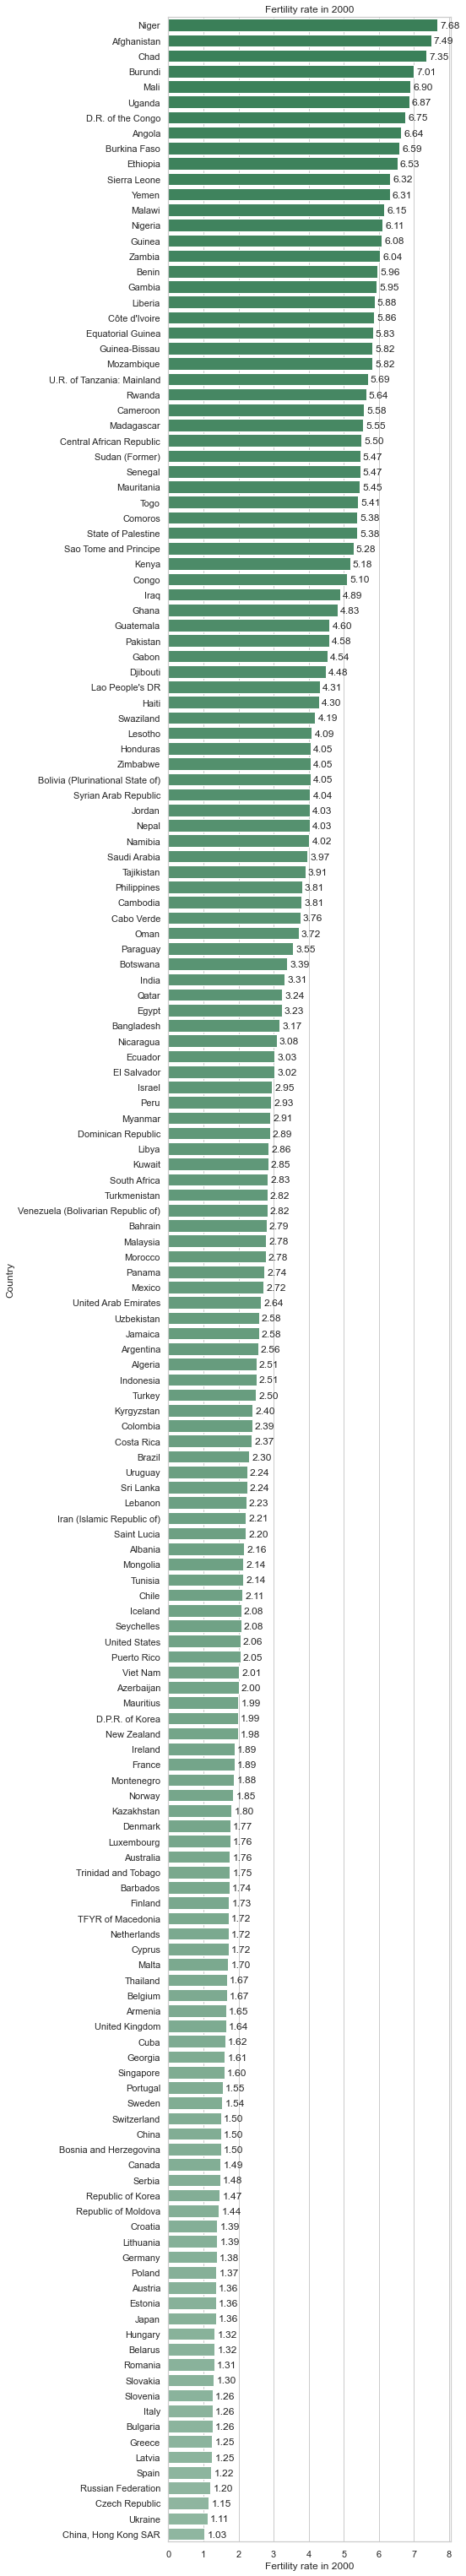

In [11]:
# (1) Compare countries w.r.t. some metric and year

########################################################

YEAR = 2000
METRIC = "Fertility rate"

########################################################

print("Try these metrics:", end=" ")
print("; ".join(possible_responses))

df_metric = (
    df[df.Year == YEAR][[METRIC, "country_name"]]
    .dropna()
    .sort_values(by=[METRIC], ascending=False)
)

f.plot_country_bars(df_metric, YEAR, METRIC)

### World map

The bar plot gives detailed information but is not helpful for a quick overview. For that purpose, a world map illustration is much better. We now read a geodataframe that can be plotted as a world map using geopandas. This frame, however, has some anomalous country codes for some reason.

In [12]:
import geopandas as gpd

# Download geopandas geodataframe
world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))
world = world.rename(columns={"iso_a3": "country_code"})

# Anomalous country code for some countries
print("Strange country codes:")
display(world[world["country_code"] == "-99"])

Strange country codes:


,pop_est,continent,name,country_code,gdp_md_est,geometry
21,5320045,Europe,Norway,-99,364700.0,"MULTIPOLYGON (((15.14282 79.67431, 15.52255 80..."
43,67106161,Europe,France,-99,2699000.0,"MULTIPOLYGON (((-51.65780 4.15623, -52.24934 3..."
160,265100,Asia,N. Cyprus,-99,3600.0,"POLYGON ((32.73178 35.14003, 32.80247 35.14550..."
167,3500000,Africa,Somaliland,-99,12250.0,"POLYGON ((48.94820 11.41062, 48.94820 11.41062..."
174,1895250,Europe,Kosovo,-99,18490.0,"POLYGON ((20.59025 41.85541, 20.52295 42.21787..."


Fix those country codes and we are ready to go.

In [13]:
# Fix independent countries
world.loc[world["name"] == "France", "country_code"] = "FRA"
world.loc[world["name"] == "Norway", "country_code"] = "NOR"
world.loc[world["name"] == "Kosovo", "country_code"] = "RKS"

# Clean and merge with main dataset
world = world.drop(columns=["pop_est", "name", "continent", "gdp_md_est"])
world_df = world.merge(df)

# Looks good now
world_df.head()

,country_code,geometry,country_name,Year,GDP per capita,Population,Life expectancy,Fertility rate,Emission of greenhouse gases (in tonnes),"Adolescent fertility rate (births per 1,000 women ages 15-19)","Mortality rate, infant (per 1,000 live births)",Urban population percentage,Age dependency ratio (% of working-age population),"Hospital beds (per 1,000 people)",Adults (ages 15+) living with HIV,Emission per capita (in tonnes),cont_name,cont_code
0,FJI,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000...",NaN,1960,NaN,393386.0,55.860,6.461,1835664.0,112.6104,54.0,29.681,101.874631,4.040609,NaN,4.666318,Oceania,OC
1,FJI,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000...",NaN,1961,NaN,407156.0,56.292,6.281,2004208.0,110.2872,52.1,30.248,101.690197,NaN,NaN,4.922457,Oceania,OC
2,FJI,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000...",NaN,1962,NaN,421577.0,56.716,6.085,2235040.0,107.9640,50.3,30.823,100.885356,NaN,NaN,5.301617,Oceania,OC
3,FJI,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000...",NaN,1963,NaN,436208.0,57.133,5.881,2476864.0,101.3952,48.8,31.403,99.647580,NaN,NaN,5.678172,Oceania,OC
4,FJI,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000...",NaN,1964,NaN,450450.0,57.545,5.676,2901769.0,94.8264,47.5,31.991,98.129772,NaN,NaN,6.441934,Oceania,OC


Try these metrics: GDP per capita; Population; Life expectancy; Fertility rate; Emission of greenhouse gases (in tonnes); Adolescent fertility rate (births per 1,000 women ages 15-19); Mortality rate, infant (per 1,000 live births); Urban population percentage; Age dependency ratio (% of working-age population); Hospital beds (per 1,000 people); Adults (ages 15+) living with HIV; Emission per capita (in tonnes)


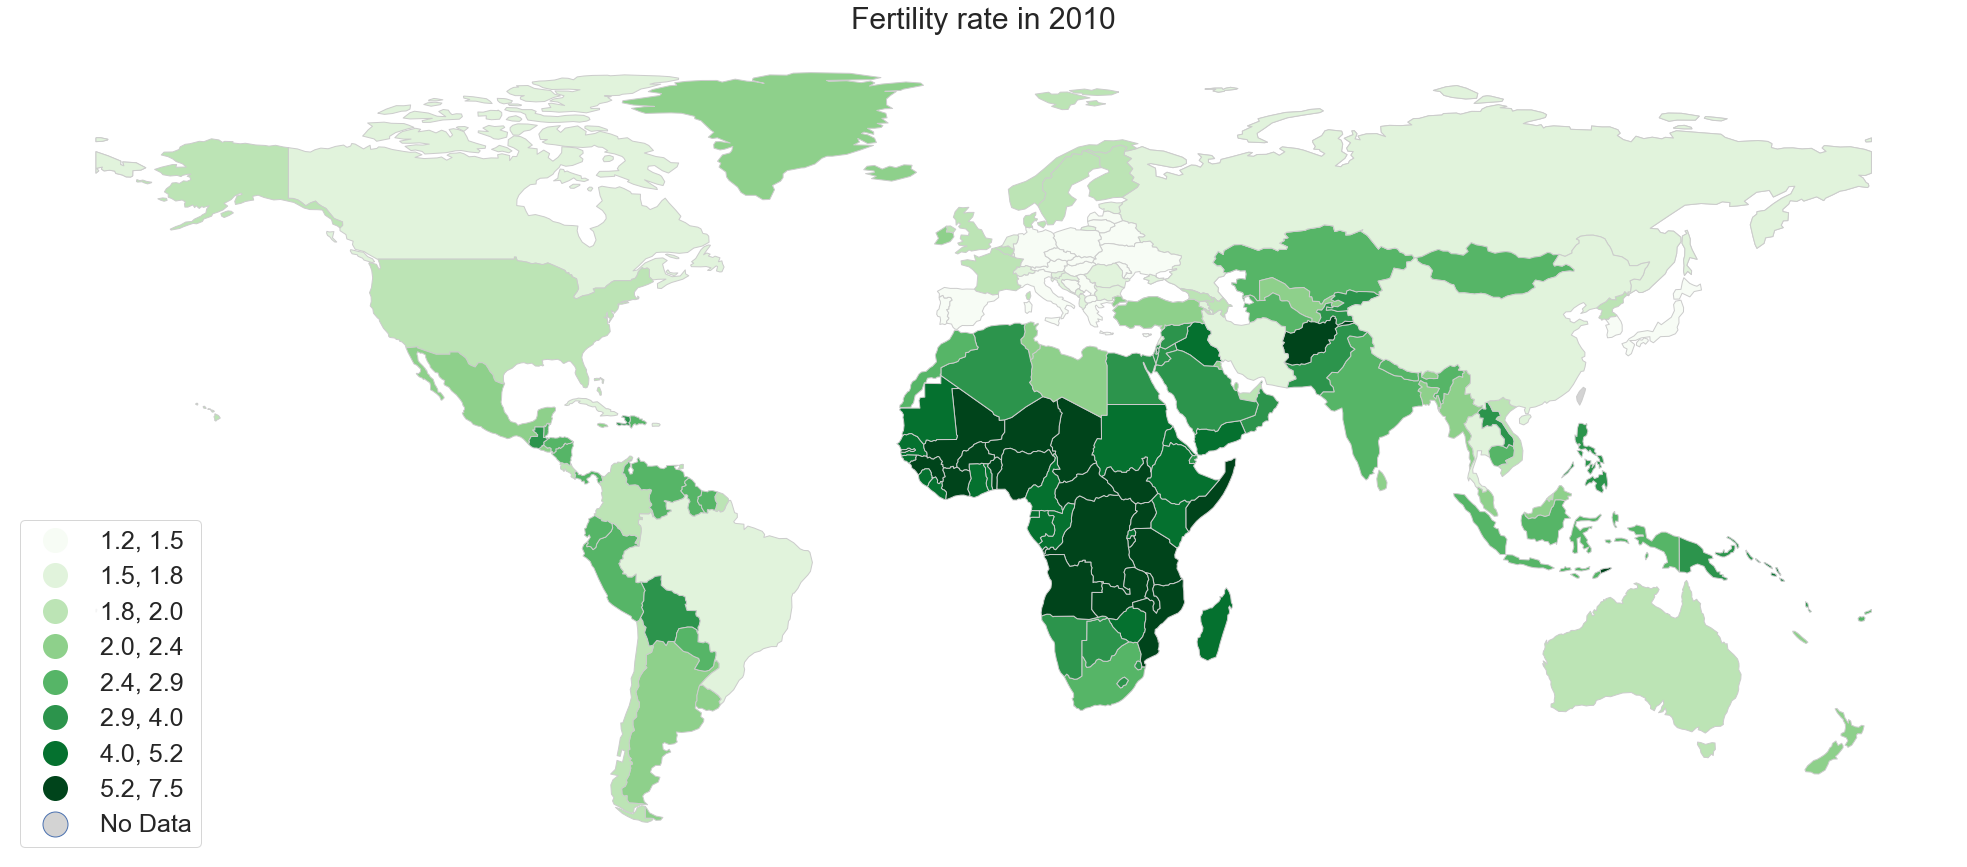

In [14]:
# (2) Compare countries on the world map

########################################################

YEAR = 2010
METRIC = "Fertility rate"
QUANTILES = 8  # Number of colours in the map

########################################################

print("Try these metrics:", end=" ")
print("; ".join(possible_responses))

f.plot_world_map(world_df, YEAR, METRIC, QUANTILES)

### Two-line plot

Try these metrics: GDP per capita; Population; Life expectancy; Fertility rate; Emission of greenhouse gases (in tonnes); Adolescent fertility rate (births per 1,000 women ages 15-19); Mortality rate, infant (per 1,000 live births); Urban population percentage; Age dependency ratio (% of working-age population); Hospital beds (per 1,000 people); Adults (ages 15+) living with HIV; Emission per capita (in tonnes)


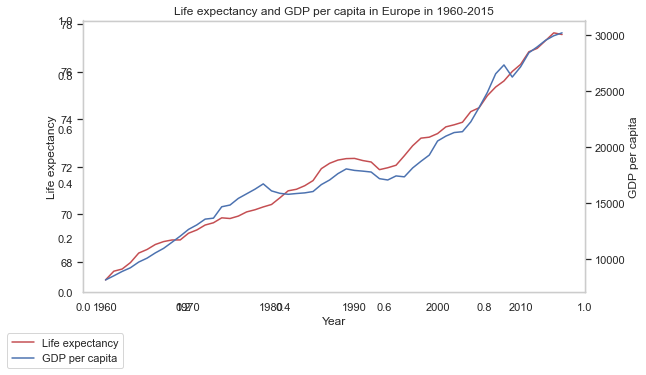

In [15]:
# (3) Compare two metrics by time for a country/continent

########################################################

CODE = "EU"  # country or continent code
METRIC1 = "Life expectancy"
METRIC2 = "GDP per capita"

########################################################

print("Try these metrics:", end=" ")
print("; ".join(possible_responses))
metrics = [METRIC1, METRIC2]
f.plot_area(
    df,
    CODE,
    metrics,
    dicts,
    years,
)

### Multiple line plots

Try these response variables: GDP per capita; Population; Life expectancy; Fertility rate; Emission of greenhouse gases (in tonnes); Adolescent fertility rate (births per 1,000 women ages 15-19); Mortality rate, infant (per 1,000 live births); Urban population percentage; Age dependency ratio (% of working-age population); Hospital beds (per 1,000 people); Adults (ages 15+) living with HIV; Emission per capita (in tonnes)


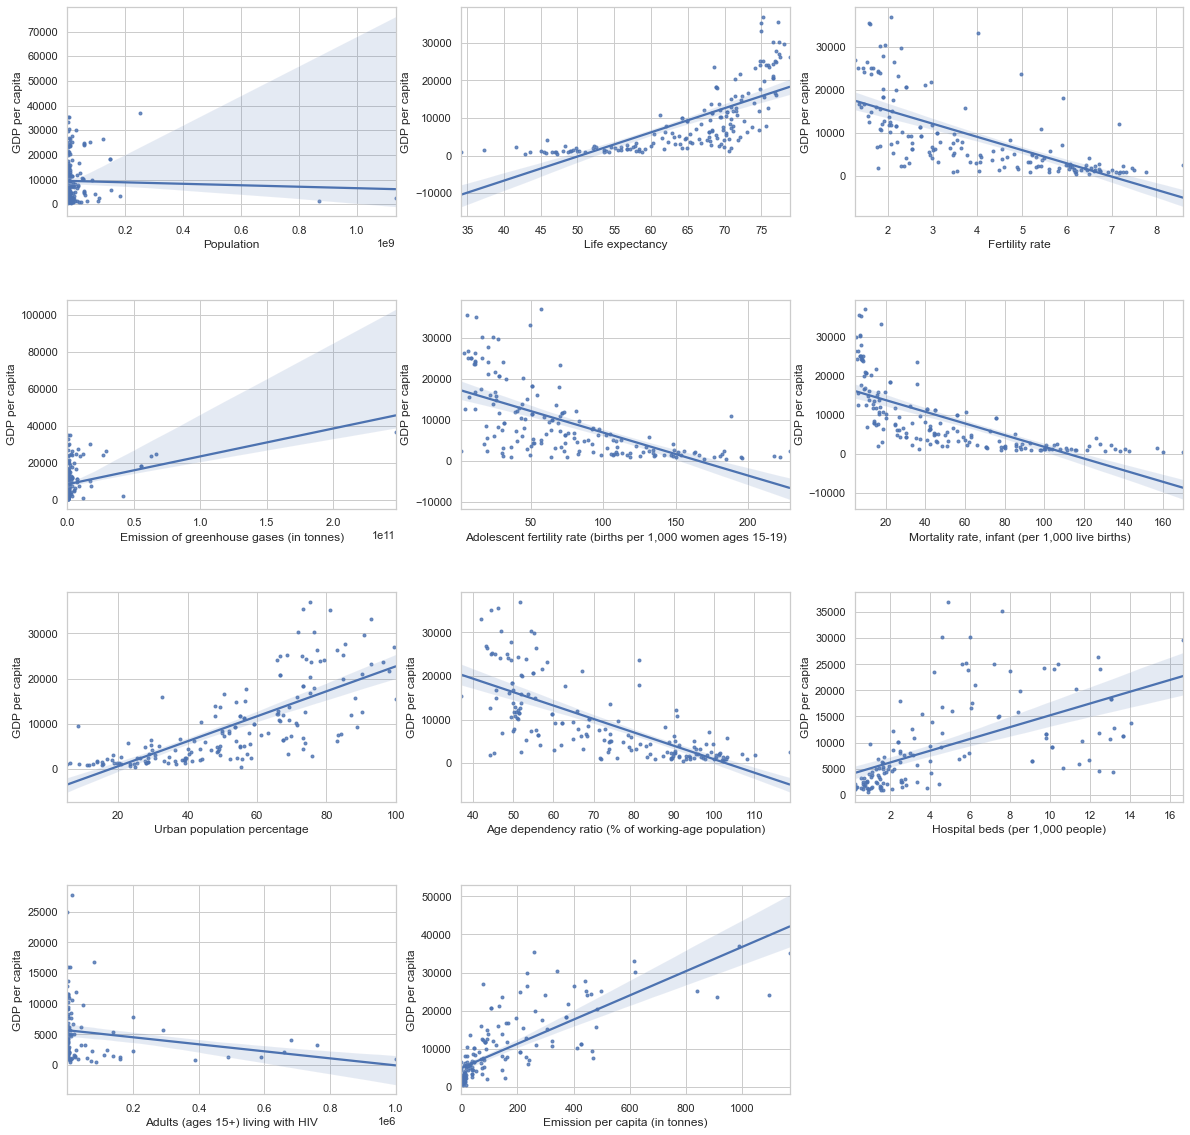

In [16]:
# (4) Plot multiple subplots to visualize correlations between different variables

########################################################

RESPONSE = "GDP per capita"
YEAR = 1990  # integer or None

########################################################

print("Try these response variables:", end=" ")
print("; ".join(possible_responses))

predictors = [item for item in possible_responses if item != RESPONSE]

if isinstance(YEAR, int):
    df_multi = df[df.Year == YEAR]
else:
    df_multi = df
    predictors.append("Year")

f.plot_multi_predictors(df_multi, RESPONSE, predictors)

Let us also view the correlations between variables as a heatmap. No surprises here. Can't be green and wealthy at the same time...

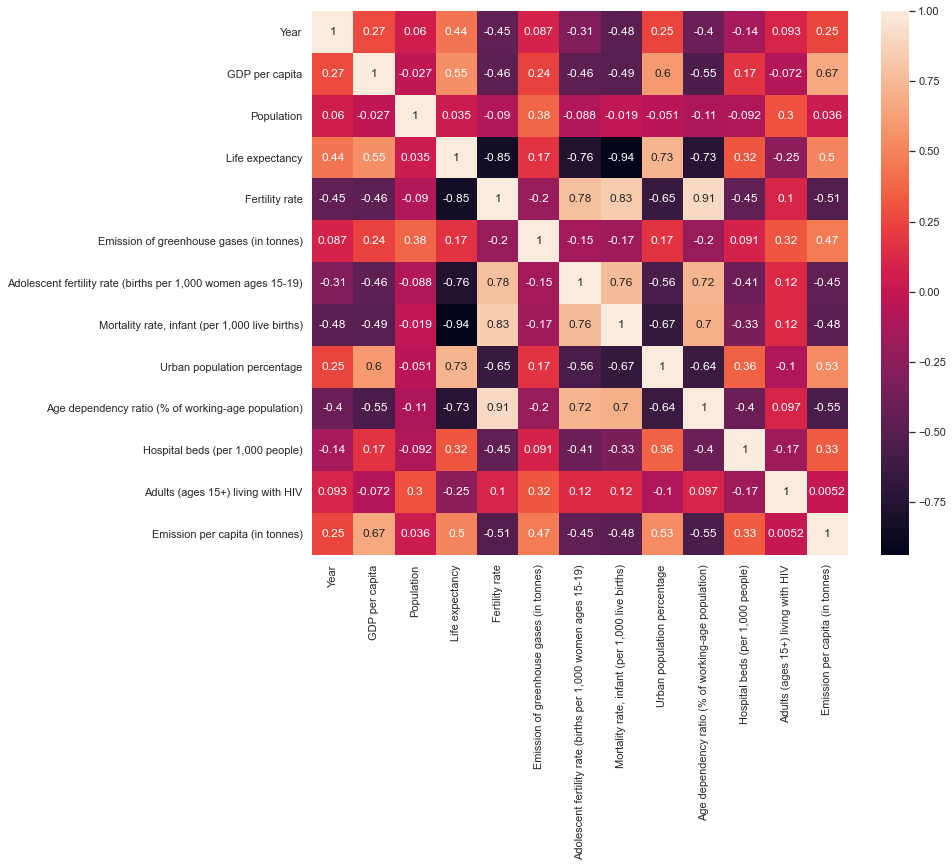

In [17]:
plt.figure(figsize=(12, 10))
ax = sns.heatmap(df.corr(), annot=True)

## Dimensionality reduction and clustering

### PCA

To see how different countries relate to each other, we turn to PCA to reduce dimensionality. There are indeed some observable patterns in data. With the default settings, we can see Northern European countries in the top left, Southern European countries in the bottom left, quite close to Easter European countries to their right. Caucasian countries are scattered toward the top right corner.

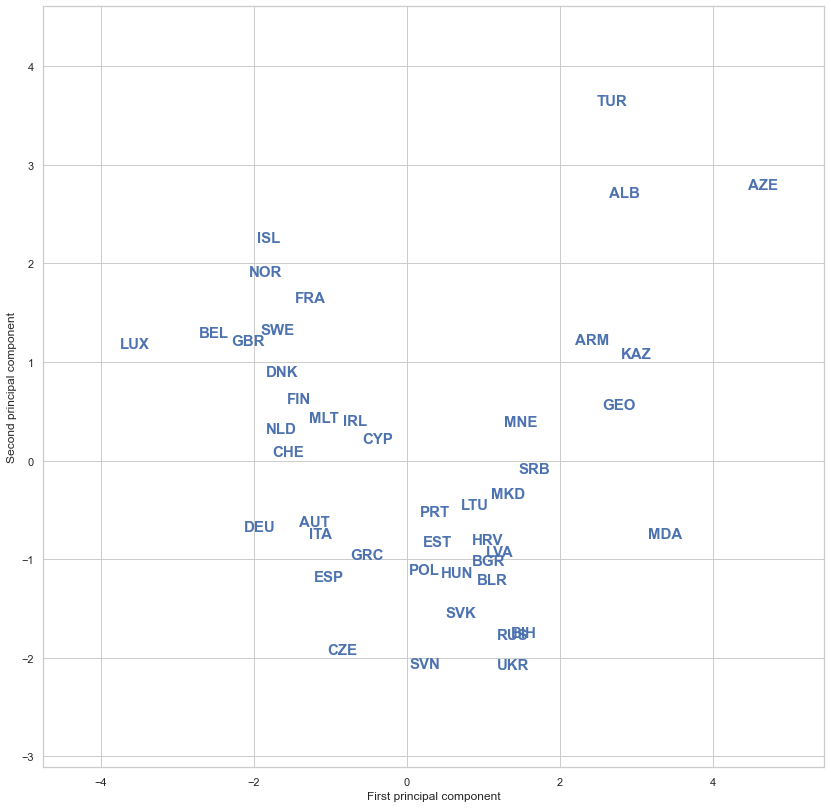

In [18]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline, Pipeline

########################################################

CONT_CODE = "EU"
YEAR = 2000
VARIABLES = [
    "GDP per capita",
    "Urban population percentage",
    "Emission per capita (in tonnes)",
    "Life expectancy",
    "Fertility rate",
    "Age dependency ratio (% of working-age population)",
    "Mortality rate, infant (per 1,000 live births)",
]

########################################################

df2 = df[(df["cont_code"] == CONT_CODE) & (df["Year"] == YEAR)]
new_df = df2[VARIABLES + ["country_code"]].dropna()
X_df = new_df[VARIABLES].values.reshape(-1, len(VARIABLES))
y_df = new_df["country_code"]

pca_pipe = make_pipeline(StandardScaler(), PCA(n_components=7))
X_pca = pca_pipe.fit_transform(X_df)

# plot first vs. second principal component
def two_dim(X, y, colors=None, title=None):
    """ Plot countries in two dimensions. """
    plt.figure(figsize=(14, 14))
    plt.xlim(X[:, 0].min() - 1, X[:, 0].max() + 1)
    plt.ylim(X[:, 1].min() - 1, X[:, 1].max() + 1)
    for i in range(len(X)):
        # actually plot the digits as text instead of using scatter
        plt.text(
            X[i, 0],
            X[i, 1],
            str(y.iloc[i]),
            color=colors[i] if colors else "b",
            fontdict={"weight": "bold", "size": 15},
        )
    plt.xlabel("First principal component")
    plt.ylabel("Second principal component")
    if title:
        plt.title(title, fontdict={"weight": "bold", "size": 20})


two_dim(X_pca, y_df)

The first component lumps together clearly correlated features, explaining almost half of the total variance. The remaining components explain less variance and are harder to make sense.

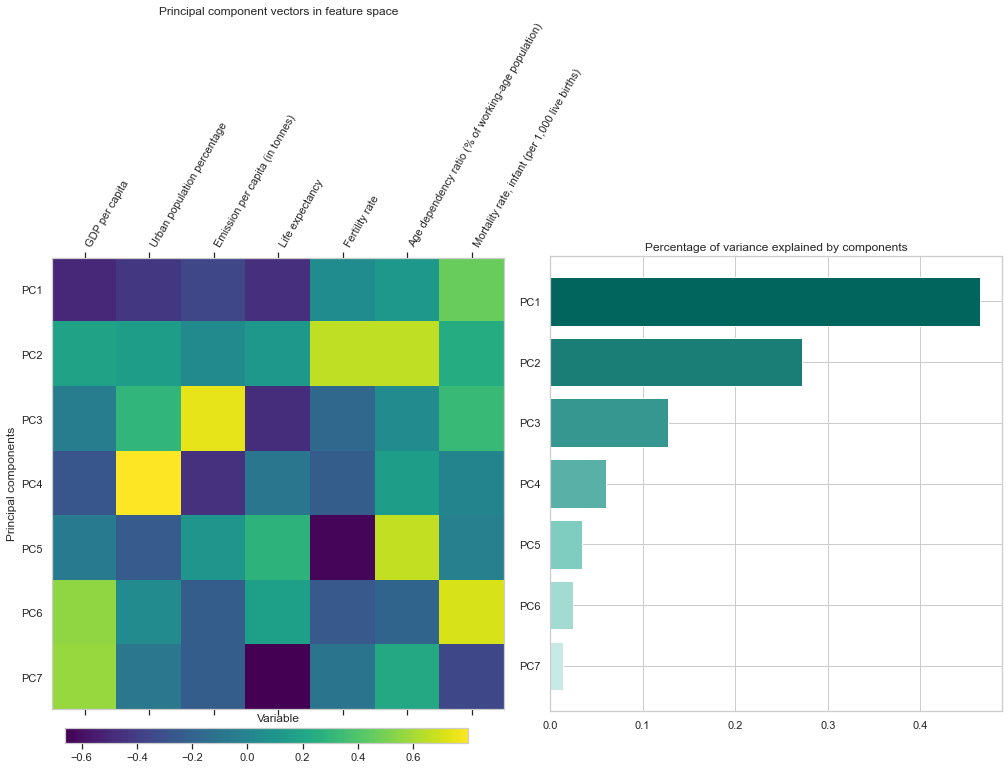

In [19]:
comp_names = ["PC{}".format(i) for i in range(1, 8)]

fig, (ax0, ax1) = plt.subplots(1, 2, figsize=(14, 7))
fig.tight_layout()

# Component vectors
im = ax0.matshow(pca_pipe.named_steps["pca"].components_, cmap="viridis")
cax = fig.add_axes([0.05, 0.0, 0.4, 0.03])
fig.colorbar(im, cax=cax, orientation="horizontal")
ax0.grid(b=None)
ax0.set_yticks(range(7))
ax0.set_yticklabels(comp_names)
ax0.set_xticks(range(len(VARIABLES)))
ax0.set_xticklabels(VARIABLES, rotation=60, ha="left")
ax0.set_xlabel("Variable")
ax0.set_ylabel("Principal components")
ax0.set_label("Component")
ax0.set_title("Principal component vectors in feature space")

# Variance percentages
ax1.barh(
    range(7),
    pca_pipe.named_steps["pca"].explained_variance_ratio_[::-1],
    color=plt.cm.BrBG(np.linspace(0.6, 0.9, 7)),
)
ax1.set_yticks(range(7))
ax1.set_yticklabels(comp_names[::-1])
_ = ax1.set_title("Percentage of variance explained by components")

### Clustering

But do computers see the same patterns as humans? Let's try various clustering methods. At least, KMeans set to 4 clusters makes exactly the same grouping as we did above!

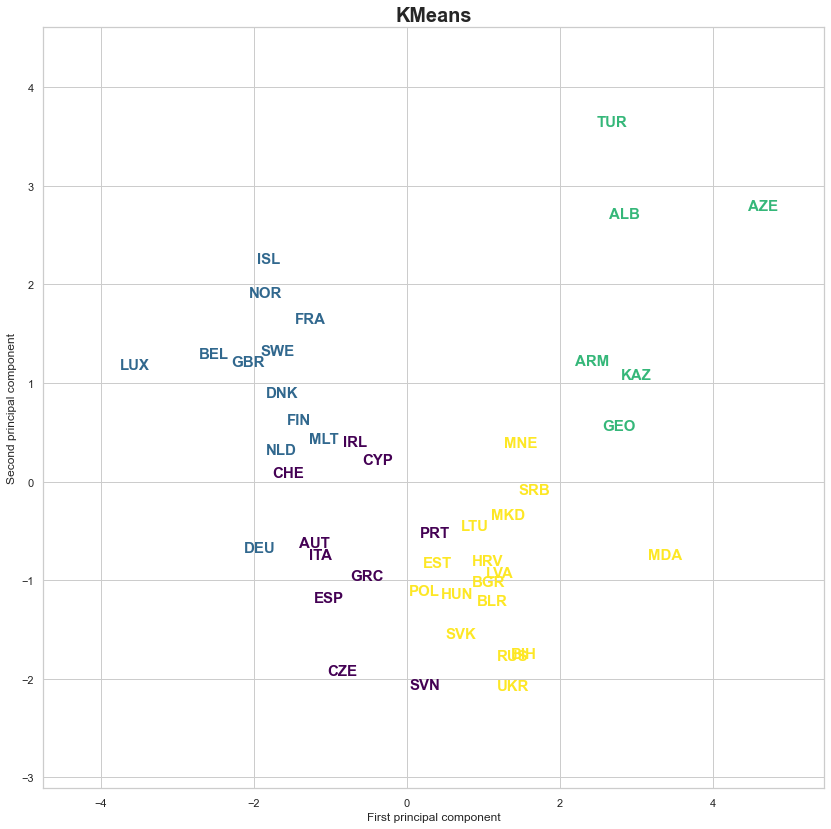

In [20]:
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN

########################################################

TYPE = "kmeans"  # "kmeans", "agglo", or "dbscan"
CLUSTERS = 4  # operative if TYPE is not "dbscan"

########################################################


if TYPE == "kmeans":
    cluster_model = KMeans(n_clusters=CLUSTERS, random_state=11)
elif TYPE == "agglo":
    cluster_model = AgglomerativeClustering(n_clusters=CLUSTERS)
elif TYPE == "dbscan":
    cluster_model = DBSCAN(min_samples=3, eps=1.4)

# Get clusters
pipe = Pipeline([("scaler", StandardScaler()), ("model", cluster_model)])
pipe.fit(X_df)
labels = pipe.named_steps["model"].labels_
clusters = len(set(labels))

# Plot clusters
viridis = plt.cm.get_cmap("viridis", clusters)
v_colors = [viridis.colors[labels[i]] for i in range(len(X_pca))]
two_dim(X_pca, y_df, colors=v_colors, title=pipe.named_steps["model"].__class__.__name__)

# Regression

Finally, we will compare various regression algorithms on our data. For this we need some feature engineering to make our data more machine accessible, so to speak.

## Feature engineering

### Data cleaning

Start by taking a look at the number of null values per each column.

In [21]:
def view_info(data):
    """ Print percentage of nulls per column. """
    print(f"Number of rows: {len(data)}\n")
    print("Percentage of missing values per column:")
    print(data.isnull().sum() / len(data) * 100)


view_info(df)

Number of rows: 13104

Percentage of missing values per column:
country_code                                                      0.000000
country_name                                                     26.068376
Year                                                              0.000000
GDP per capita                                                   29.677961
Population                                                        5.929487
Life expectancy                                                  14.323871
Fertility rate                                                   14.155983
Emission of greenhouse gases (in tonnes)                          5.555556
Adolescent fertility rate (births per 1,000 women ages 15-19)    17.735043
Mortality rate, infant (per 1,000 live births)                   26.640720
Urban population percentage                                       8.379121
Age dependency ratio (% of working-age population)               16.521673
Hospital beds (per 1,000 people)    

Some columns are almost always null. We are going to drop those ones first.

In [22]:
# Drop columns with high percentage of nulls
nulls = df.isnull().sum() / len(df) * 100
columns = nulls[nulls > 40]

df_drop = df.copy()
for column in columns.index:
    df_drop = df_drop.drop(columns=column)

# Drop country_name, cont_name
df_drop = df_drop.drop(columns=["country_name", "cont_name"])

# With default settings 4 columns are gone
df_drop.head()

,country_code,Year,GDP per capita,Population,Life expectancy,Fertility rate,Emission of greenhouse gases (in tonnes),"Adolescent fertility rate (births per 1,000 women ages 15-19)","Mortality rate, infant (per 1,000 live births)",Urban population percentage,Age dependency ratio (% of working-age population),Emission per capita (in tonnes),cont_code
0,AFG,1960,2744.0,8996351.0,32.292,7.45,2253063.0,145.321,NaN,8.221,81.717726,0.250442,AS
1,AFG,1961,2708.0,9166764.0,32.742,7.45,2743861.0,145.321,240.5,8.508,82.755896,0.299327,AS
2,AFG,1962,2695.0,9345868.0,33.185,7.45,3432455.0,145.321,236.3,8.805,83.304557,0.367270,AS
3,AFG,1963,2683.0,9533954.0,33.624,7.45,4139191.0,145.321,232.3,9.110,83.550740,0.434153,AS
4,AFG,1964,2673.0,9731361.0,34.060,7.45,4977742.0,145.321,228.5,9.426,83.734442,0.511516,AS


 Now, less than a third of the values are nulls in the remaining columns. 

In [23]:
view_info(df_drop)

Number of rows: 13104

Percentage of missing values per column:
country_code                                                      0.000000
Year                                                              0.000000
GDP per capita                                                   29.677961
Population                                                        5.929487
Life expectancy                                                  14.323871
Fertility rate                                                   14.155983
Emission of greenhouse gases (in tonnes)                          5.555556
Adolescent fertility rate (births per 1,000 women ages 15-19)    17.735043
Mortality rate, infant (per 1,000 live births)                   26.640720
Urban population percentage                                       8.379121
Age dependency ratio (% of working-age population)               16.521673
Emission per capita (in tonnes)                                  10.966117
cont_code                           

Let us view how many nulls typically occur in each row. As we can see, in most cases there is no missing value, or only one or two missing values.

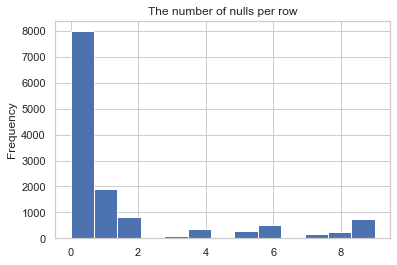

In [24]:
# View histogram for the number of nulls per row
total_nulls = df_drop.isnull().sum(axis=1)
_ = total_nulls.plot.hist(bins=13, title="The number of nulls per row")

We now remove rows with a lot of null values. This shrinks our dataset a bit, down to 10k rows.

In [25]:
# Remove rows with more than 2 nulls
num_columns = len(df_drop.columns)
df_drop2 = df_drop.dropna(thresh=(num_columns - 2))

# Update info
view_info(df_drop2)

Number of rows: 10716

Percentage of missing values per column:
country_code                                                      0.000000
Year                                                              0.000000
GDP per capita                                                   17.403882
Population                                                        0.000000
Life expectancy                                                   0.298619
Fertility rate                                                    0.391937
Emission of greenhouse gases (in tonnes)                          0.000000
Adolescent fertility rate (births per 1,000 women ages 15-19)     1.791713
Mortality rate, infant (per 1,000 live births)                   13.297872
Urban population percentage                                       0.000000
Age dependency ratio (% of working-age population)                0.046659
Emission per capita (in tonnes)                                   0.000000
cont_code                           

The remaining missing values are going to be filled by annual continental averages.

In [26]:
# Fill missing values by group average per year and continent
df_drop3 = df_drop2.copy()
for column in df_drop3.columns.tolist():
    if df_drop3[column].dtype == "float64":
        df_drop3[column] = df.groupby(["Year", "cont_code"])[column].apply(
            lambda x: x.fillna(x.mean())
        )

view_info(df_drop3)

Number of rows: 10716

Percentage of missing values per column:
country_code                                                     0.000000
Year                                                             0.000000
GDP per capita                                                   0.000000
Population                                                       0.000000
Life expectancy                                                  0.000000
Fertility rate                                                   0.000000
Emission of greenhouse gases (in tonnes)                         0.000000
Adolescent fertility rate (births per 1,000 women ages 15-19)    1.745054
Mortality rate, infant (per 1,000 live births)                   0.000000
Urban population percentage                                      0.000000
Age dependency ratio (% of working-age population)               0.000000
Emission per capita (in tonnes)                                  0.000000
cont_code                                       

There are still some missing values. This means that some continental annual data is entirely missing. Indeed, we have no adolescent fertility rates from 2015.

In [27]:
# The remaining missing values are from year 2015
df_drop3[df_drop3.isnull().any(axis=1)]

,country_code,Year,GDP per capita,Population,Life expectancy,Fertility rate,Emission of greenhouse gases (in tonnes),"Adolescent fertility rate (births per 1,000 women ages 15-19)","Mortality rate, infant (per 1,000 live births)",Urban population percentage,Age dependency ratio (% of working-age population),Emission per capita (in tonnes),cont_code
55,AFG,2015,1928.000000,33736494.0,63.288,4.802,1.532303e+08,NaN,66.3,26.703,86.954464,4.541974,AS
111,AGO,2015,8631.000000,27859305.0,61.241,5.766,5.530214e+08,NaN,96.0,44.050,99.855751,19.850509,AF
167,ALB,2015,10947.000000,2880703.0,78.174,1.714,2.646261e+08,NaN,12.5,57.407,44.806973,91.861648,EU
223,ARE,2015,69237.000000,9154302.0,77.101,1.765,3.689529e+09,NaN,5.9,85.541,17.751439,403.037716,AS
279,ARG,2015,19316.000000,43417765.0,76.415,2.308,7.565986e+09,NaN,11.1,91.751,56.545360,174.260142,SA
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11927,SUR,2015,14127.800000,553208.0,71.279,2.396,1.002952e+08,NaN,19.0,66.043,50.756036,181.297375,SA
12151,TON,2015,38890.500000,106364.0,72.880,3.678,3.689692e+06,NaN,14.4,23.712,74.329250,34.689293,OC
12263,VCT,2015,16467.333333,109455.0,73.060,1.953,5.783644e+06,NaN,16.6,50.550,46.759445,52.840382,NA
12431,VUT,2015,38890.500000,264603.0,71.925,3.312,3.963838e+06,NaN,23.1,26.128,68.719678,14.980321,OC


Let us just ignore these data now. We are still left with 10k rows.

In [28]:
# Simply drop the remaining nulls
df_clean = df_drop3.dropna()
view_info(df_clean)

Number of rows: 10529

Percentage of missing values per column:
country_code                                                     0.0
Year                                                             0.0
GDP per capita                                                   0.0
Population                                                       0.0
Life expectancy                                                  0.0
Fertility rate                                                   0.0
Emission of greenhouse gases (in tonnes)                         0.0
Adolescent fertility rate (births per 1,000 women ages 15-19)    0.0
Mortality rate, infant (per 1,000 live births)                   0.0
Urban population percentage                                      0.0
Age dependency ratio (% of working-age population)               0.0
Emission per capita (in tonnes)                                  0.0
cont_code                                                        0.0
dtype: float64


### Histograms

Next, let us take a look at the histograms of value distributions for each column. Many distributions seem somewhat skewed.

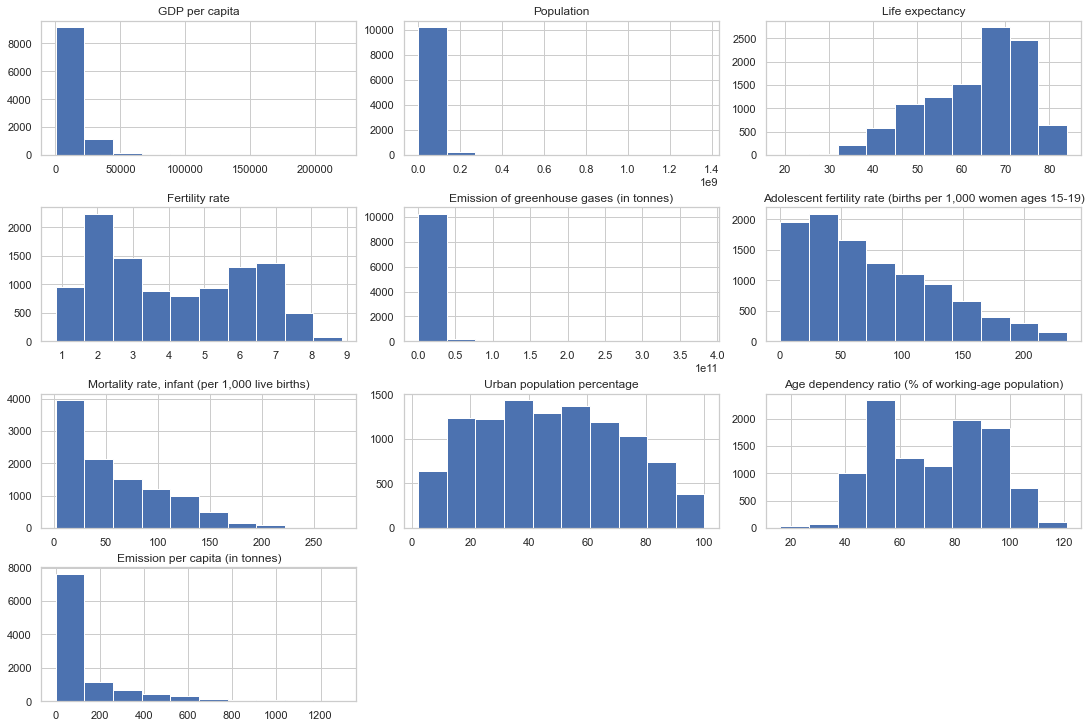

In [29]:
# View histograms for columns
columns = df_clean.columns.tolist()
num_columns = [col for col in columns if df_clean[col].dtype == "float64"]


def hist_cols(data, cols):
    """ Plot histograms for value frequency at each column. """
    _, axes = plt.subplots(
        -(-len(cols) // 3), 3, figsize=(15, 10), constrained_layout=True
    )

    for col, ax in zip(cols, axes.ravel()):
        ax.hist(data[col], bins=10)
        ax.set_title(col)

    if len(cols) % 3 == 1:
        axes[-1, -1].axis("off")
        axes[-1, -2].axis("off")
    elif len(cols) % 3 == 2:
        axes[-1, -1].axis("off")


hist_cols(df_clean, num_columns)

After log transformation many distributions seem closer to normal distribution. Below we compare different algorithms both with and without log transformation. 

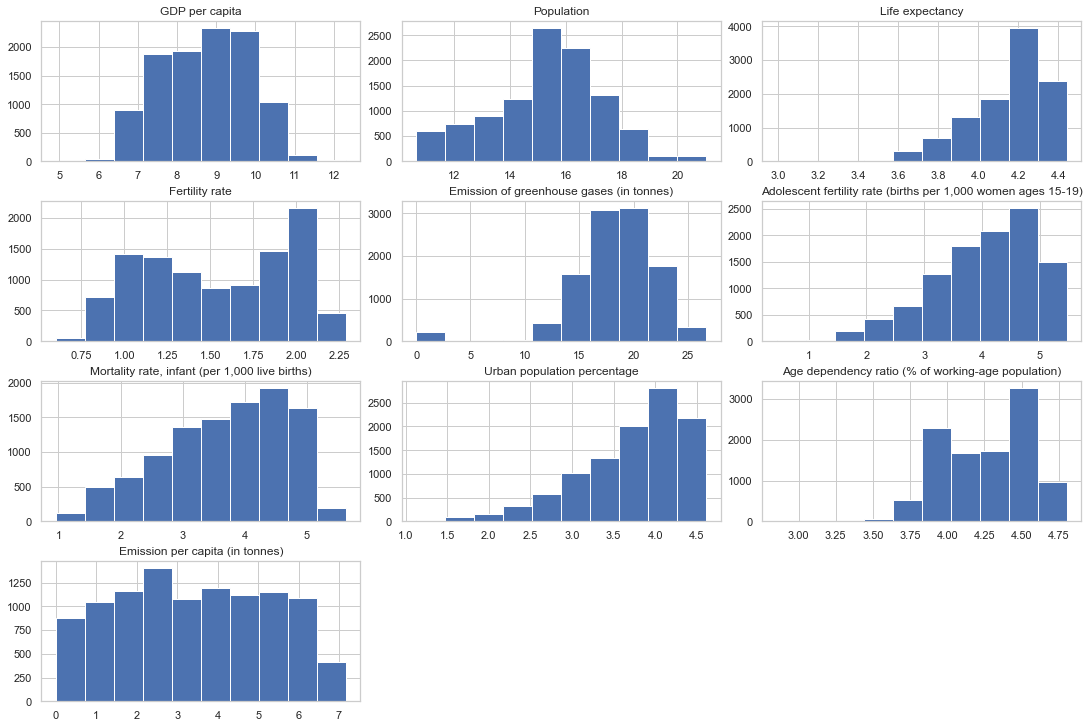

In [30]:
# View histograms for columns after log transformation
df_log = df_clean.copy()
for column in num_columns:
    df_log[column] = df_log[column].apply(lambda x: np.log(x + 1))

hist_cols(df_log, num_columns)

### One-hot format

It would be also nice to include country and continent information in our data set. Let us thus enforce a one-hot format on the categorical variables. This increases the number of columns significantly. Then, we are ready to go.

In [31]:
def to_onehot(data):
    """ Return categorical columns and data in one-hot format."""
    return data[["country_code", "cont_code"]], pd.get_dummies(data)


df_cat, df_onehot = to_onehot(df_clean)

# A snapshot of data in one-hot format
df_onehot.head()

,Year,GDP per capita,Population,Life expectancy,Fertility rate,Emission of greenhouse gases (in tonnes),"Adolescent fertility rate (births per 1,000 women ages 15-19)","Mortality rate, infant (per 1,000 live births)",Urban population percentage,Age dependency ratio (% of working-age population),...,country_code_YEM,country_code_ZAF,country_code_ZMB,country_code_ZWE,cont_code_AF,cont_code_AS,cont_code_EU,cont_code_NA,cont_code_OC,cont_code_SA
0,1960,2744.0,8996351.0,32.292,7.45,2253063.0,145.321,115.785,8.221,81.717726,...,0,0,0,0,0,1,0,0,0,0
1,1961,2708.0,9166764.0,32.742,7.45,2743861.0,145.321,240.500,8.508,82.755896,...,0,0,0,0,0,1,0,0,0,0
2,1962,2695.0,9345868.0,33.185,7.45,3432455.0,145.321,236.300,8.805,83.304557,...,0,0,0,0,0,1,0,0,0,0
3,1963,2683.0,9533954.0,33.624,7.45,4139191.0,145.321,232.300,9.110,83.550740,...,0,0,0,0,0,1,0,0,0,0
4,1964,2673.0,9731361.0,34.060,7.45,4977742.0,145.321,228.500,9.426,83.734442,...,0,0,0,0,0,1,0,0,0,0


## Comparison of regression models

In the next cell, select a feature to be predicted. We have used fertility rate below, but any other feature can also be selected. The data is divided to train and test sets by a selected year. That is, we make a single split and do not consider cross validation here.

In [32]:
# Select a feature to be predicted

########################################################

FEATURE = "Fertility rate"
NUM_YEARS = 10  # The number of years (from the tail end) reserved for test data

########################################################


def separate(data, num_years):
    """ Separate data to train and test set by year """
    year = max(data.Year) - num_years
    data_test = data[data.Year >= year]
    data_train = data[data.Year < year]

    return data_train, data_test, year


# Retrieve the number of numerical predictor names
number = len(
    df_clean.drop(columns=[FEATURE, "cont_code", "country_code"]).columns.tolist()
)

# Retrieve categorical columns and their onehot encodings
df_cat, df_onehot = to_onehot(df_clean)
df = pd.concat([df_cat, df_onehot], axis=1)

# Split to train and test data
df_train, df_test, threshold = separate(df, NUM_YEARS)

# Store categorical columns of train and test data
df_train_cat = df_train[["country_code", "cont_code"]]
df_test_cat = df_test[["country_code", "cont_code"]]

# Retrieve all predictor names and train/test sets
y_train = df_train[FEATURE].to_numpy()
df_train = df_train.drop(columns=["country_code", "cont_code", FEATURE])
feat_names = df_train.columns.tolist()
X_train = df_train.to_numpy()
y_test = df_test[FEATURE].to_numpy()
df_test = df_test.drop(columns=["country_code", "cont_code", FEATURE])
X_test = df_test.to_numpy()

print("Try these response variables:", end=" ")
print("; ".join(possible_responses))

Try these response variables: GDP per capita; Population; Life expectancy; Fertility rate; Emission of greenhouse gases (in tonnes); Adolescent fertility rate (births per 1,000 women ages 15-19); Mortality rate, infant (per 1,000 live births); Urban population percentage; Age dependency ratio (% of working-age population); Hospital beds (per 1,000 people); Adults (ages 15+) living with HIV; Emission per capita (in tonnes)


### Linear models

Consider linear regression as a baseline model. As it turns out, the train score is fairly good, but the model does not generalize to the test set.

In [33]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression().fit(X_train, y_train)

print(
    "{:<20}Train score: {:.3f}".format("Linear regression", lr.score(X_train, y_train))
)
print("{:<20}Test score: {:.3f}".format("", lr.score(X_test, y_test)))

Linear regression   Train score: 0.970
                    Test score: 0.864


Before making comparison to more advanced models, we define custom grid search for hyperparameter tuning. This grid search is defined in terms of a pipeline that runs through a preprocessor, two transformers, and the final estimator.

In [34]:
import itertools
from sklearn.base import clone, BaseEstimator, TransformerMixin
from sklearn.pipeline import FeatureUnion


class ColumnCompression(BaseEstimator, TransformerMixin):
    """ Custom transformer that restricts to first 'n_numerical' columns"""

    def __init__(self, n_numerical=None):
        super().__init__()
        self.n_numerical = n_numerical

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        X_compressed = X[:, : self.n_numerical]
        return X_compressed


def customgs(param_grid_dict, **kwargs):
    """ Custom grid search for a pipeline """
    best_test = 0
    id_transform = FunctionTransformer(lambda x: x)
    output_dict = {}

    # Scale before for-loop. No data leakage as the train and test sets are not mixed.
    X_scaler = clone(kwargs["scaler"]) if kwargs["scaler"] else id_transform
    # The target feature is not currently scaled
    y_scaler = (
        id_transform  # clone(kwargs["scaler"]) if kwargs["scaler"] else id_transform
    )
    X_train_scaled = X_scaler.fit_transform(X_train)
    X_test_scaled = X_scaler.transform(X_test)
    y_train_scaled = y_scaler.fit_transform(y_train)
    y_test_scaled = y_scaler.transform(y_test)
    output_dict["y_scaler"] = y_scaler
    output_dict["X_scaler"] = X_scaler

    for m_params, p_params, f_params in itertools.product(
        list(ParameterGrid(param_grid_dict["model_params"])),
        list(ParameterGrid(param_grid_dict["poly_params"])),
        list(ParameterGrid(param_grid_dict["func_params"])),
    ):
        # model
        model = clone(kwargs["model"]).set_params(**m_params)
        # function transformer
        func = (
            clone(kwargs["func"]).set_params(**f_params)
            if kwargs["func"]
            else id_transform
        )
        # polynomial transformer
        poly = (
            clone(kwargs["poly"]).set_params(**p_params)
            if kwargs["poly"]
            else id_transform
        )
        # restrict polynomial transformer to numerical features
        compress = ColumnCompression(n_numerical=number)
        polyunion = FeatureUnion(
            [("first", id_transform), ("second", make_pipeline(compress, poly))]
        )
        # fit pipeline
        pipeline = make_pipeline(func, polyunion, model)
        pipeline.fit(X_train_scaled, y_train_scaled)
        if pipeline.score(X_test_scaled, y_test_scaled) > best_test:
            best_test = pipeline.score(X_test_scaled, y_test_scaled)
            output_dict["train"] = pipeline.score(X_train_scaled, y_train_scaled)
            output_dict["best_test"] = best_test
            output_dict["best_pipe"] = pipeline
            output_dict["best_model"] = model
            output_dict["m_params"] = m_params
            output_dict["p_params"] = p_params
            output_dict["f_params"] = f_params

    return output_dict

Lasso and Ridge regression perform much better on the test set than ordinary least squares linear regression. Both also reach optimal results without log transformation.

In [35]:
from sklearn.linear_model import Ridge, Lasso
from sklearn.model_selection import ParameterGrid
from sklearn.preprocessing import PolynomialFeatures, FunctionTransformer

# Define named identity and log functions for the pipeline
def identity(x):
    """ Named identity """
    return x


def log10(x):
    """ Named logarithm """
    return np.log(x + 10)

########################################################

components = {
    "scaler": StandardScaler(),  # e.g. StandardScaler(), MinMaxScaler()
    "func": FunctionTransformer(),
    "poly": PolynomialFeatures(),
    "model": Ridge(max_iter=100000),
}

param_grids = {
    "func_params": {"func": [identity, log10]},
    "poly_params": {"degree": [1, 2]},
    "model_params": {"alpha": [0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000, 1e5]},
}

########################################################

ridge_output = customgs(param_grids, **components)
components["model"] = Lasso(max_iter=100000)
lasso_output = customgs(param_grids, **components)


def print_results(model_name, output_dict):
    """ Print parameters and R^2 scores for the best model. """
    print("{:<30}Best model params: {}".format(model_name, output_dict["m_params"]))
    print("{:<30}Best func params: {}".format("", output_dict["f_params"]))
    print("{:<30}Best poly params: {}".format("", output_dict["p_params"]))
    print("{:<30}Best test R^2 score: {:.3f}".format("", output_dict["best_test"]))
    print("{:<30}Corresponding train R^2 score: {:.3f}".format("", output_dict["train"]))


print_results(ridge_output["best_model"].__class__.__name__, ridge_output)
print()
print_results(lasso_output["best_model"].__class__.__name__, lasso_output)

Ridge                         Best model params: {'alpha': 10000}
                              Best func params: {'func': <function identity at 0x133ce14c0>}
                              Best poly params: {'degree': 1}
                              Best test R^2 score: 0.915
                              Corresponding train R^2 score: 0.921

Lasso                         Best model params: {'alpha': 0.1}
                              Best func params: {'func': <function identity at 0x133ce14c0>}
                              Best poly params: {'degree': 2}
                              Best test R^2 score: 0.914
                              Corresponding train R^2 score: 0.915


A couple observations:

- Ridge regression uses L2-norm for regularization which, as seen below, rarely yields non-zero coefficients.
- Lasso regression uses L1-norm which typically reduces many coefficients to zero. Interestingly, we find two types of categorical features with a nonnegative coefficient: codes for the continents of North America and Europe, and codes for oil procuding countries in the Middle East. For instance, the latter fact probably indicates that compared to other "high-performing" countries these countries have had anomalous fertility rates.

Features with non-zero coefficient in Lasso regression:
Life expectancy, Adolescent fertility rate (births per 1,000 women ages 15-19), Mortality rate, infant (per 1,000 live births), Age dependency ratio (% of working-age population), country_code_ARE, country_code_BHR, country_code_KWT, country_code_OMN, country_code_QAT, country_code_SAU, cont_code_EU, cont_code_NA


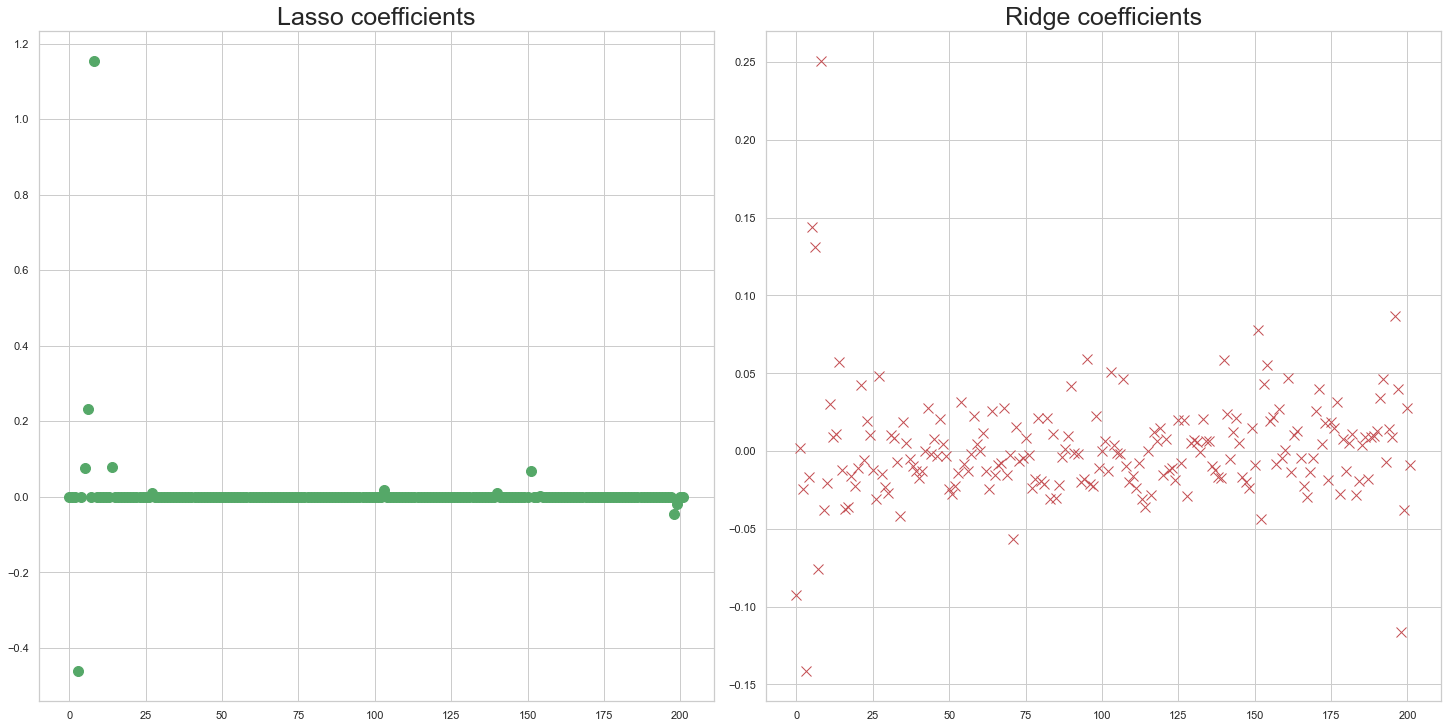

In [36]:
# Plot feature coefficients for features with degree 1
ridge_coef = ridge_output["best_model"].coef_.reshape([-1])[: len(feat_names)]
lasso_coef = lasso_output["best_model"].coef_.reshape([-1])[: len(feat_names)]

_, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10), constrained_layout=True)
ax1.plot(lasso_coef, "o", color="g", markersize=10, label="Lasso")
ax1.set_title("Lasso coefficients", size=25)
ax2.plot(ridge_coef, "x", color="r", markersize=10, label="Ridge")
ax2.set_title("Ridge coefficients", size=25)

feat_names = np.array(feat_names)
non_zero_feat = ", ".join(list(feat_names[lasso_coef != 0]))
print(
    "Features with non-zero coefficient in Lasso regression:\n{}".format(non_zero_feat)
)

### Tree models

Next we turn to tree models. As the baseline tree model, DecisionTreeRegressor (over)fits the train set perfectly. It also obtains, using log transformation, a test score almost on par with Lasso and Ridge.

In [37]:
from sklearn.tree import DecisionTreeRegressor

########################################################

components = {
    "scaler": StandardScaler(),  # Scaling should not be important here but works better...
    "func": FunctionTransformer(),
    "poly": PolynomialFeatures(),
    "model": DecisionTreeRegressor(),
}

param_grids = {
    "func_params": {"func": [identity, log10]},
    "poly_params": {"degree": [1, 2]},
    "model_params": {"min_samples_split": [2, 3, 5], "min_samples_leaf": [1, 2, 3, 5]},
}

########################################################

tree_output = customgs(param_grids, **components)
print_results(tree_output["best_model"].__class__.__name__, tree_output)

DecisionTreeRegressor         Best model params: {'min_samples_leaf': 2, 'min_samples_split': 3}
                              Best func params: {'func': <function log10 at 0x133ce1430>}
                              Best poly params: {'degree': 2}
                              Best test R^2 score: 0.905
                              Corresponding train R^2 score: 0.999


RandomForestRegressor also overfits the train set but still yields an R^2 test score of 96.1%. Note that it takes a while to run the following cell. Todo: find better hyperparameters e.g. by randomizing the selection space in grid search.

In [38]:
from sklearn.ensemble import RandomForestRegressor

########################################################

components = {
    "scaler": StandardScaler(),
    "func": None,  # FunctionTransformer(),
    "poly": PolynomialFeatures(),
    "model": RandomForestRegressor(random_state=42),
}

param_grids = {
    "func_params": {"func": ["dummy"]},  # {'func': [identity, log10]},
    "poly_params": {"degree": [1]},
    "model_params": {
        "n_estimators": [100],
        "min_samples_split": [2, 4],
        "min_samples_leaf": [1, 3],
        "max_depth": [10, 30],
        "max_features": ["auto", "log2"],
        "random_state": [42],
    },
    "n_jobs": [-1],
}

########################################################

forest_output = customgs(param_grids, **components)
print_results(forest_output["best_model"].__class__.__name__, forest_output)

RandomForestRegressor         Best model params: {'max_depth': 30, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100, 'random_state': 42}
                              Best func params: {'func': 'dummy'}
                              Best poly params: {'degree': 1}
                              Best test R^2 score: 0.961
                              Corresponding train R^2 score: 0.999


GradientBoostingRegressor performs slightly better than RandomForestRegressor. This cell also takes some time to execute.

In [39]:
from sklearn.ensemble import GradientBoostingRegressor

########################################################

components = {
    "scaler": StandardScaler(),
    "func": None,  # FunctionTransformer(),
    "poly": PolynomialFeatures(),
    "model": GradientBoostingRegressor(random_state=42),
}

param_grids = {
    "func_params": {"func": ["dummy"]},  # {'func': [identity, log10]},
    "poly_params": {"degree": [1]},
    "model_params": {
        "learning_rate": [0.1, 0.01],
        "n_estimators": [100],
        "min_samples_split": [2, 4],
        "min_samples_leaf": [1, 3],
        "max_depth": [10, 30],
        "max_features": ["auto", "log2"],
        "random_state": [42],
    },
    "n_jobs": [-1],
}

########################################################

grad_output = customgs(param_grids, **components)
print_results(grad_output["best_model"].__class__.__name__, grad_output)

GradientBoostingRegressor     Best model params: {'learning_rate': 0.1, 'max_depth': 10, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 4, 'n_estimators': 100, 'random_state': 42}
                              Best func params: {'func': 'dummy'}
                              Best poly params: {'degree': 1}
                              Best test R^2 score: 0.963
                              Corresponding train R^2 score: 0.996


Let us view the feature imporatences in different tree regressors. The decision tree regressor is overly reliant on a single metric, i.e., the age dependency ratio. Random forest and gradient boosted regressors can restrict the number of features considered at each split. This reduces reliance on those features that would otherwise be dominant, having thus a regularizing effect.  

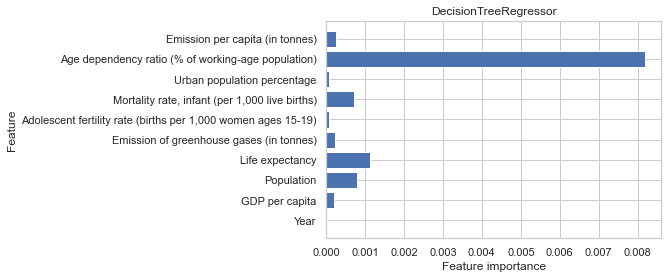

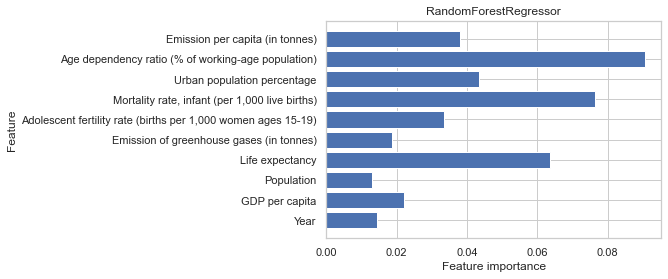

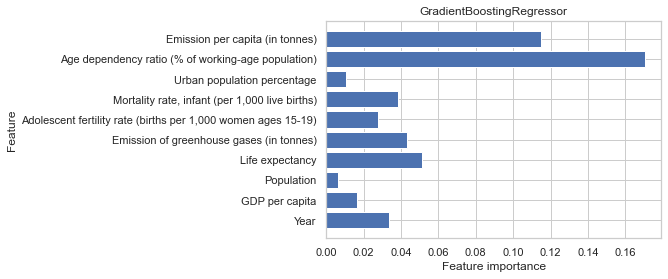

In [40]:
def plot_feature_importances(name, model):
    """ Plot feature importances for the three tree regressors. """
    plt.barh(range(number), model.feature_importances_[:number], align="center")
    plt.yticks(np.arange(number), feat_names[:number])
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    plt.title(name)
    plt.show()


plot_feature_importances(
    tree_output["best_model"].__class__.__name__, tree_output["best_model"]
)
plot_feature_importances(
    forest_output["best_model"].__class__.__name__, forest_output["best_model"]
)
plot_feature_importances(
    grad_output["best_model"].__class__.__name__, grad_output["best_model"]
)

### Support vector machines

Beside tree regressors, consider also support vector regression. We obtain a 93.8% test score. 

In [41]:
from sklearn.svm import SVR

########################################################

components = {
    "scaler": StandardScaler(),
    "func": FunctionTransformer(),
    "poly": PolynomialFeatures(),
    "model": SVR(),
}

param_grids = {
    "func_params": {"func": [identity, log10]},
    "poly_params": {"degree": [1]},
    "model_params": {"kernel": ["rbf", "linear"], "C": [0.001, 0.01, 0.1, 1, 10]},
}

########################################################

support_output = customgs(param_grids, **components)
print_results(support_output["best_model"].__class__.__name__, support_output)

SVR                           Best model params: {'C': 1, 'kernel': 'rbf'}
                              Best func params: {'func': <function log10 at 0x133ce1430>}
                              Best poly params: {'degree': 1}
                              Best test R^2 score: 0.938
                              Corresponding train R^2 score: 0.985


### Visualize results

Conclude this notebook by visualizing the obtained predictions. First add the predicted and real feature values to the data set.

In [42]:
df_train[FEATURE] = y_train
df_test[FEATURE] = y_test
df_train2 = pd.concat([df_train, df_train_cat], axis=1)
df_test2 = pd.concat([df_test, df_test_cat], axis=1)


def get_column_name(output_dict):
    """ Retrieve column name from output dict. """
    return FEATURE + " (" + output_dict["best_model"].__class__.__name__ + ")"


def add_column(data_train, data_test, *output_dicts):
    """ Add predicted values. """
    for output_dict in output_dicts:
        # Retrieve predictions
        X_train_scaled = output_dict["X_scaler"].transform(X_train)
        X_test_scaled = output_dict["X_scaler"].transform(X_test)
        y_train_scaled = output_dict["best_pipe"].predict(X_train_scaled)
        y_test_scaled = output_dict["best_pipe"].predict(X_test_scaled)
        y_train_pred = output_dict["y_scaler"].inverse_transform(y_train_scaled)
        y_test_pred = output_dict["y_scaler"].inverse_transform(y_test_scaled)

        # Add column
        column_name = get_column_name(output_dict)
        data_train[column_name] = y_train_pred
        data_test[column_name] = y_test_pred

    return data_train, data_test


outputs = [
    ridge_output,
    lasso_output,
    tree_output,
    forest_output,
    grad_output,
    support_output,
]
df_train3, df_test3 = add_column(df_train2, df_test2, *outputs)
df_pred = pd.concat([df_train3, df_test3], axis=0)

df_pred.head()

,Year,GDP per capita,Population,Life expectancy,Emission of greenhouse gases (in tonnes),"Adolescent fertility rate (births per 1,000 women ages 15-19)","Mortality rate, infant (per 1,000 live births)",Urban population percentage,Age dependency ratio (% of working-age population),Emission per capita (in tonnes),...,cont_code_SA,Fertility rate,country_code,cont_code,Fertility rate (Ridge),Fertility rate (Lasso),Fertility rate (DecisionTreeRegressor),Fertility rate (RandomForestRegressor),Fertility rate (GradientBoostingRegressor),Fertility rate (SVR)
0,1960,2744.0,8996351.0,32.292,2253063.0,145.321,115.785,8.221,81.717726,0.250442,...,0,7.45,AFG,AS,7.021939,6.544766,7.469,7.370214,7.308657,7.308493
1,1961,2708.0,9166764.0,32.742,2743861.0,145.321,240.500,8.508,82.755896,0.299327,...,0,7.45,AFG,AS,7.698711,7.179941,7.450,7.439168,7.381051,7.284172
2,1962,2695.0,9345868.0,33.185,3432455.0,145.321,236.300,8.805,83.304557,0.367270,...,0,7.45,AFG,AS,7.662560,7.168530,7.450,7.435538,7.366569,7.309402
3,1963,2683.0,9533954.0,33.624,4139191.0,145.321,232.300,9.110,83.550740,0.434153,...,0,7.45,AFG,AS,7.619627,7.140041,7.450,7.437932,7.339437,7.320349
4,1964,2673.0,9731361.0,34.060,4977742.0,145.321,228.500,9.426,83.734442,0.511516,...,0,7.45,AFG,AS,7.576142,7.108880,7.450,7.437932,7.340602,7.326910


In the concluding plot we see that:

- Decision tree regressor fits train data perfectly but cannot extrapolate to test data poorly
- Random forest and gradient boosting regressors are less overfitting. They can also detect the beginning of an uphill trend in the test data.
- Ridge and Lasso are more biased than the tree models. Only Lasso can detect the uphill trend.
- SVR does not learn the uphill trend either.

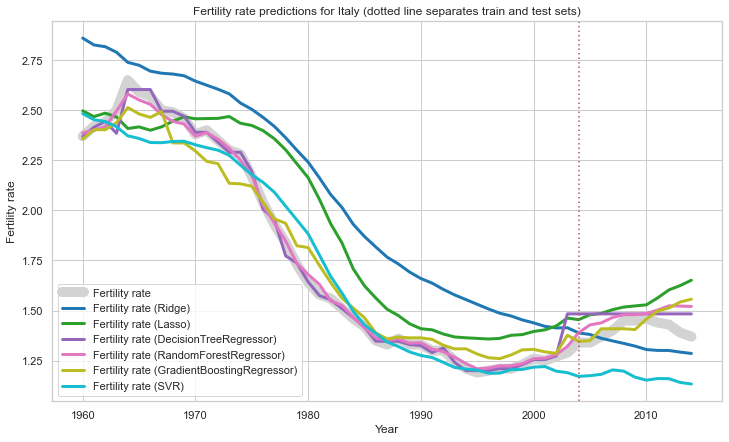

In [43]:
# Predict the selected feature for some country

########################################################

COUNTRY_CODE = "ITA"

########################################################

country_name = f.code_to_country(COUNTRY_CODE, code_to_country_dict)
colormap = plt.cm.get_cmap("tab10", len(outputs))

df_temp = df_pred[df_pred["country_code"] == COUNTRY_CODE]
df_temp.set_index("Year", inplace=True)
fig = plt.figure(figsize=(12, 7))
sns.lineplot(data=df_temp[FEATURE], color="lightgray", linewidth=10, label=FEATURE)
for i, output in enumerate(outputs):
    sns.lineplot(
        data=df_temp[get_column_name(output)],
        linewidth=3,
        color=colormap.colors[i],
        label=get_column_name(output),
    )
plt.axvline(threshold, 0, 5, color="r", dashes=(1, 2))
_ = plt.title(
    "{} predictions for {} (dotted line separates train and test sets)".format(
        FEATURE, country_name
    )
)